In [122]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X = mnist['data']
y = mnist['target']

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
def plot_digits(X):
    some_digit = X
    some_digit = np.array(some_digit)
    some_digit_pic = some_digit.reshape(28, 28)
    fig = plt.figure
    plt.imshow(some_digit_pic, cmap='binary')
    plt.show()

# Binary Classification

In [42]:
some_digit = X.iloc[[0]].values.tolist()

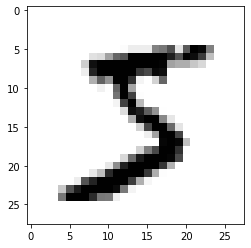

In [43]:
plot_digits(some_digit)

In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
y_train_5

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
sgd_clf.predict(some_digit)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
sk = StratifiedKFold(n_splits=3, shuffle=True,random_state=42)
n_correct_tot = 0

for train_index, test_index in sk.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    X_train_folds, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_folds, y_test_fold = y_train_5[train_index], y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    n_correct_tot += n_correct / len(y_pred)
    print(n_correct / len(y_pred))
print(n_correct_tot/sk.n_splits)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

In [ ]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred)) # == 4096 / (4096 + 1522)

recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

In [ ]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
print(precision_score(y_train_5, y_train_pred_90), recall_score(y_train_5, y_train_pred_90))


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [ ]:
y_probas_forest[:,1]

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
y_scores_forest = (y_scores_forest > 0.5)
y_scores_forest

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_scores_forest))

recall_score(y_train_5, y_scores_forest)

# End of Binary Classification

# -------------------------------------------------------------------------------------

# Multiclass Classification

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict(some_digit)

In [ ]:
some_digit_scores = svm_clf.decision_function(some_digit)
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[5]

In [ ]:
# Takes Much Time
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(some_digit)

In [ ]:
sgd_clf.decision_function(some_digit)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict(some_digit)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[0]])

In [ ]:
plot_digits([X_test_mod.iloc[0]])

In [ ]:
plot_digits(clean_digit)

In [ ]:
kn_clf = KNeighborsClassifier()

In [ ]:
cross_val_score(kn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
def GSCV(X_train, y_train, X_test, y_test):
    estimator_KNN = KNeighborsClassifier()
    parameters_KNN = {
        'n_neighbors': (3, 5, 10),
        'leaf_size': (1, 20, 40),
        'p': (1, 2),
    }
    grid_search_KNN = GridSearchCV(estimator=estimator_KNN, 
                                    param_grid=parameters_KNN,
                                    scoring = 'accuracy',
                                    cv = 3
                                    )
    KNN_1=grid_search_KNN.fit(X_train, y_train)
    y_pred_KNN1 =KNN_1.predict(X_test)
    print(grid_search_KNN.best_params_ ) 
    print('Best Score - KNN:', grid_search_KNN.best_score_ )
    
GSCV(X_train, y_train, X_test, y_test)

In [25]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn_clf = KNeighborsClassifier()
weight_options = ['uniform', 'distance']
k_range = list(range(4, 11))
param_dist = dict(n_neighbors=k_range, weights=weight_options)
grid_search_KNN = RandomizedSearchCV(estimator=knn_clf, 
                                    param_distributions=param_dist,
                                    scoring = 'accuracy',
                                    cv = 3)
KNN_1=grid_search_KNN.fit(X_train, y_train)
print(grid_search_KNN.best_params_ ) 
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'weights': 'distance', 'n_neighbors': 4}
Best Score - KNN: 0.9703500000000002


In [26]:
from sklearn.neighbors import KNeighborsClassifier
para = {'weights': 'distance', 'n_neighbors': 4}
knn_clf = KNeighborsClassifier(**para)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [27]:
y_knn_pred = knn_clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

# --------------------------------------------------------------------------------------

In [188]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train_augmented, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [191]:
len(X_train_augmented) # 60,000 * 5

300000

In [193]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]

300000

In [194]:
knn_clf.fit(X_train_augmented, y_train_augmented)
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.9763

# ------------------------------------------------------------